# Precession Of Planetary Orbits
George Poole grp39@cam.ac.uk

One of Newtonian gravity's shortcomings was its failure to explain the perihelion precession of Mercury. With a Newtonian gravitational potential

$$\Phi_N(r)=-\frac{GM}{r}$$

the equation for the shape of the orbit with $u=1/r$ 

$$\frac{\text{d}^2u}{\text{d}\phi^2}+u=\frac{GM}{h^2}$$

is obtained. This can be solved analytically, giving a solution

$$r(\phi)=\frac{h^2/GM}{1+e\cos\theta}~~~$$

if the initial conditions are chosen such that the planet is at its perihelion when $\phi=0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

A more detailed analysis shows that general relativity predicts a modification to right hand side of the differential equation for $u(\phi)$, giving

$$\frac{\text{d}^2u}{\text{d}\phi^2}+u=\frac{GM}{h^2}+\frac{3GM}{c^2}u^2~~~.$$

This is now non-linear and only approximate solutions can be obtained. 

... calculations ...

The perihelion advance by an angle

$$\Delta\phi=\frac{6\pi GM}{a(1-e^2)c^2}$$

every revolution. Clearly, this is only significant for small $a$ and $e\approx 1$ which explains why precession of the highly eccentric orbit of Mercury close to the Sun is most noticeable.

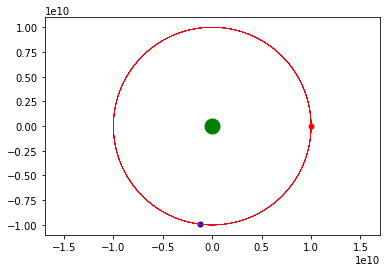

In [28]:
G=6.67*10**(-11)
M=1.99*10**(30)
c=3*10**8

h=10**10

angle=36

def dx_dphi(x,phi):
    u,dash_u=x
    du_dphi=dash_u
    d2u_dphi2=-u+(G*M)/(h**2)+(3*G*M*u**2)/(c**2)
    return du_dphi, d2u_dphi2

x_initial=[10**(-10),0]
phi=np.linspace(0,angle,num=1000)
u,dash_u=odeint(dx_dphi,x_initial,angle).T

r=1/u

x=r*np.cos(phi)
y=r*np.sin(phi)

plt.plot(x,y,lw=0.5,color='b')
plt.plot(x[0],y[0],ms=5,color='r',marker='o')
plt.plot(x[-1],y[-1],ms=5,color='b',marker='o')
plt.plot(0,0,ms=15,color='g',marker='o')
plt.axis('equal')

e=0.9
alpha=3*G**2*M**2/(c**2*h**2)

u_approx=(1+e*np.cos(phi*(1-alpha)))*G*M/(h**2)

r_approx=1/u
x_approx=r*np.cos(phi)
y_approx=r*np.sin(phi)
plt.plot(x_approx,y_approx,lw=0.5,color='r')

plt.show()

## Related Courses

* Relativity, Part II Physics
* General Relativity, Part II Mathematics